In [1]:
#Populate namespace with packages and dataframe
import initx
initx.run(globals())

In [2]:
#The following workflow is called by initx.run
help(dataframe_cleaning.clean)

Help on function clean in module dataframe_cleaning:

clean(housing_df)
    Compound cleaning function. Runs each other cleaning function in this file in the order originally intended.
    
    housing_df (parameter) 
    |
    v clean_null_columns
    |
    v fix_misleading_columns
    |
    v convert_date_to_ordinal
    |
    v
    cleaned_df (return)



In [3]:
help(dataframe_cleaning.clean_null_columns)

Help on function clean_null_columns in module dataframe_cleaning:

clean_null_columns(housing_df)
    Cleans and mutates the dataframe columns containing nulls to prepare it for modeling.
    
    Changed Columns:
        Waterfront:
            Changes to dummy variables `yes`, `no` and `missing` (implied).
            This will give the models a chance to discover if there is a correlation between missing and the dependent variable. If there is no correlation it can be dropped.
        Yr_renovated:
            Removed due to miniscule r_squared
        View:
            Replaced Nan's with the mean. This has miniscule negative affects on the correlation.



In [4]:
help(dataframe_cleaning.fix_misleading_columns)

Help on function fix_misleading_columns in module dataframe_cleaning:

fix_misleading_columns(housing_df)
    The basement and date columns are stored as strings but represent other data types. This function takes the steps to convert them to their intended data type.
    
    Sqft_Basement:
        All values of '?' are replaced with the median.
        Basement is cast to float from string.
    Date:
        Cast from string to date time.



In [5]:
help(dataframe_cleaning.convert_date_to_ordinal)

Help on function convert_date_to_ordinal in module dataframe_cleaning:

convert_date_to_ordinal(housing_df)
    The OLS function cannot calculate a regression line on categorical values. This funcion converts the date_time data type to OLS friendly integer type.



In [6]:
#Data is cleaned and ready for modelling
#Next I Min-Max scale all the columns except price
help(scale_and_normalize.min_max_dataframe)

Help on function min_max_dataframe in module scale_and_normalize:

min_max_dataframe(dataframe, ignore=[])
    Min Max scales each column in the dateframe.
    
    Parameters:
        dataframe - the dataframe to be min max scaled
        ignore - will not min max scale column names in this list



In [7]:
#The four models I created
models =om.get_models()

In [8]:
models.keys()

dict_keys(['base', 'logged', 'logged_inverse', 'engineered', 'logged_engineered', 's_base', 's_logged', 's_logged_inverse', 's_engineered', 's_logged_engineered', 'final'])

RSquared=0.7010062093897046


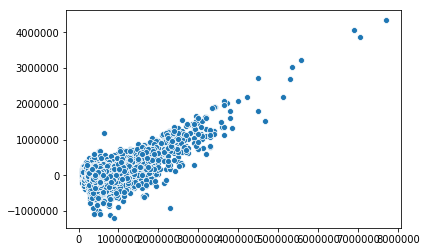

In [9]:
'''
Model 1:
    Just took the dataframe and ran it through the basic model.
'''
visual.present(models["base"])

RSquared=0.7713787919671306


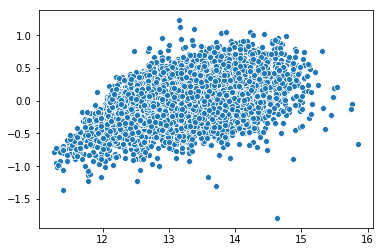

In [10]:
'''
Model 2:
    Basic model except price (the target) is logged.
'''
visual.present(models["logged"])

RSquared=0.7116591166008303


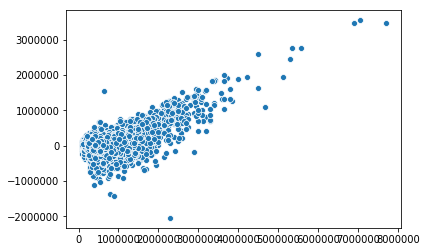

In [11]:
'''
Model 3:
    Instead of logging price, all features are inverse logged.
'''
visual.present(models["logged_inverse"])

RSquared=0.7182584259363928


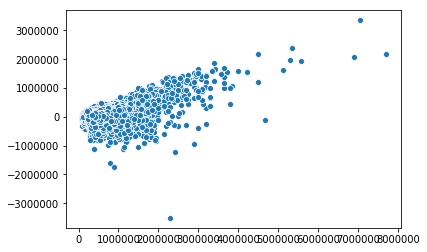

In [12]:
'''
Model 4:
    Base model but with many features transformed.
    I think the main reason this model suffers is the same as why the inverese did not work.
'''
visual.present(models["engineered"])

RSquared=0.7171270589512947


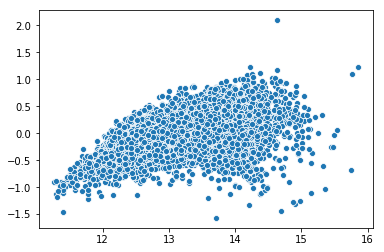

In [13]:
'''
Model 5:
    Same as above except price is logged.
'''
visual.present(models["logged_engineered"])

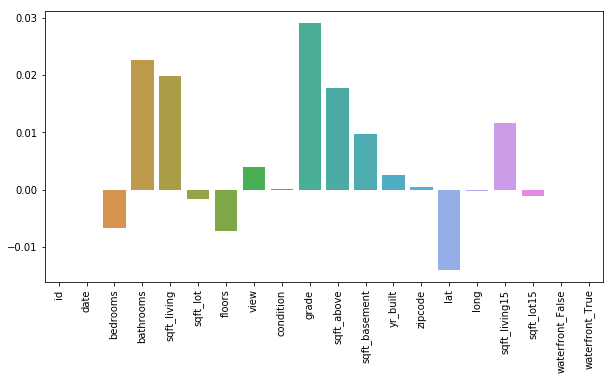

In [14]:
#Engineering Methodology 
#Look through all columns and see if a transform benefitted the rsquared of hurt it.
#I used this methodology on a variety of transformations
import warnings
warnings.simplefilter(action="ignore")

x = []
y_this = []

for col in df.columns:
    if col != "price":
        r_2_transformed = sm.OLS(df.price,sm.add_constant(np.e**(np.array(df[col])))).fit().rsquared
        r_2 = sm.OLS(df.price,sm.add_constant(df[col])).fit().rsquared
        x.append(col)
        dif = r_2_transformed-r_2
        y_this.append(dif)
plt.figure(figsize=(10,5))

plt.xticks(rotation=90)
ax = plt.subplot()

sns.barplot(x=x,y=y_this,ax=ax)
#y_this

In [15]:
best_model = models["logged"]

In [16]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3640.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:52:15   Log-Likelihood:                -856.78
No. Observations:               21597   AIC:                             1756.
Df Residuals:                   21576   BIC:                             1923.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.3628      0.017    687.174      0.000      11.330      11.395
id                   0.0066      0.006      1.108      0.268      -0.005       0.018
date                 0.0761      0.006     12.823      0.000       0.064       0.088
bedrooms            -0.4231      0.076     -5.561      0.000      -0.572      -0.274
bathrooms            0.5573      0.030     18.329      0.000       0.498       0.617
sqft_living          1.7720      0.298      5.947      0.000       1.188       2.356
sqft_lot             0.7621      0.099      7.686      0.000       0.568       0.957
floors               0.1949      0.011     17.316      0.000       0.173       0.217
view                 0.2493      0.011     23.444      0.000       0.228       0.270
condition            0.2445      0.012     21.029      0.000       0.222       0.267
grade                1.6114      0.027     59.606      0.000       1.558       1.664
sqft_above           0.0092      0.204      0.045      0.964      -0.391       0.410
sqft_basement        0.0826      0.108      0.765      0.444      -0.129       0.294
yr_built            -0.4209      0.010    -42.429      0.000      -0.440      -0.401
zipcode             -0.1296      0.008    -15.859      0.000      -0.146      -0.114
lat                  0.8692      0.008    104.065      0.000       0.853       0.886
long                -0.1861      0.020     -9.380      0.000      -0.225      -0.147
sqft_living15        0.5613      0.025     22.387      0.000       0.512       0.610
sqft_lot15          -0.2190      0.080     -2.733      0.006      -0.376      -0.062
waterfront_False     0.0042      0.005      0.772      0.440      -0.007       0.015
waterfront_True      0.3876      0.023     16.739      0.000       0.342       0.433
==============================================================================
Omnibus:                      381.456   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.614
Skew:                          -0.033   Prob(JB):                    3.10e-170
Kurtosis:                       3.929   Cond. No.                         441.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#remove poor rsquared
final_model = models["final"]

RSquared=0.7712639851151564


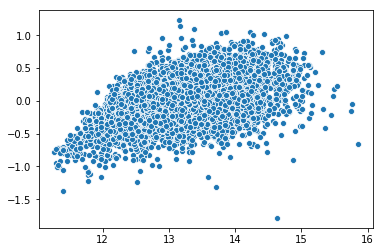

In [18]:
visual.present(final_model)

In [24]:
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     4548.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:59:29   Log-Likelihood:                -862.20
No. Observations:               21597   AIC:                             1758.
Df Residuals:                   21580   BIC:                             1894.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3711      0.016    730.526      0.000      11.341      11.402
date                0.0760      0.006     12.813      0.000       0.064       0.088
bedrooms           -0.4209      0.076     -5.531      0.000      -0.570      -0.272
bathrooms           0.5710      0.030     19.013      0.000       0.512       0.630
sqft_living         1.8571      0.055     33.617      0.000       1.749       1.965
sqft_lot            0.7475      0.099      7.552      0.000       0.553       0.941
floors              0.1805      0.010     17.889      0.000       0.161       0.200
view                0.2544      0.010     24.255      0.000       0.234       0.275
condition           0.2468      0.012     21.302      0.000       0.224       0.270
grade               1.6008      0.027     59.822      0.000       1.548       1.653
yr_built           -0.4205      0.010    -42.393      0.000      -0.440      -0.401
zipcode            -0.1292      0.008    -15.806      0.000      -0.145      -0.113
lat                 0.8719      0.008    105.087      0.000       0.856       0.888
long               -0.1951      0.020     -9.999      0.000      -0.233      -0.157
sqft_living15       0.5509      0.025     22.205      0.000       0.502       0.600
sqft_lot15         -0.2293      0.080     -2.870      0.004      -0.386      -0.073
waterfront_True     0.3820      0.023     16.848      0.000       0.338       0.426
==============================================================================
Omnibus:                      373.821   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              756.828
Skew:                          -0.037   Prob(JB):                    4.54e-165
Kurtosis:                       3.914   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#missing: 
#Model Validation
#Mulicolinearity fix
#Heteroscedacity fix
#Outliers removed